# 1. Random Forest Introduction

Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

# 2. Random Forest algorithm intuition

Random forest algorithm intuition can be divided into two stages.

In the first stage, we randomly select “k” features out of total m features and build the random forest. In the first stage, we proceed as follows:-

1. Randomly select k features from a total of m features where k < m.
2. Among the k features, calculate the node d using the best split point.
3. Split the node into daughter nodes using the best split.
4. Repeat 1 to 3 steps until l number of nodes has been reached.
5. Build forest by repeating steps 1 to 4 for n number of times to create n number of trees.

In the second stage, we make predictions using the trained random forest algorithm.

1. We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2. Then, we calculate the votes for each predicted target.
3. Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.

# 3. Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Importing dataset

In [2]:
df = pd.read_csv("car_evaluation.csv")

# 5. EDA

In [3]:
df.shape

(1727, 7)

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Frequency distribution of values in variables: 

Now, I will check the frequency counts of categorical variables.

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts()) 

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables

- There are 7 variables in the dataset. All the variables are of categorical data type.
- These are given by buying, maint, doors, persons, lug_boot, safety and class.
- class is the target variable.

In [9]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature.

In [10]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# 6. Split data into separate training and test set

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

In [12]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

# 7. Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [14]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables

Now, I will encode the categorical variables.

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [16]:
!pip install category_encoders

We can see that all the variables are ordinal categorical data type.

In [17]:
# import category encoders

import category_encoders as ce

In [18]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# 8.  Random Forest Classifier model with default parameters 

In [21]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

In [22]:
# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# 9. Random Forest Classifier model with parameter n_estimators=100

In [23]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

In [24]:
# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


# 10.  Find important features with Random Forest model 

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [25]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

Now, I will visualize the feature scores with matplotlib and seaborn.

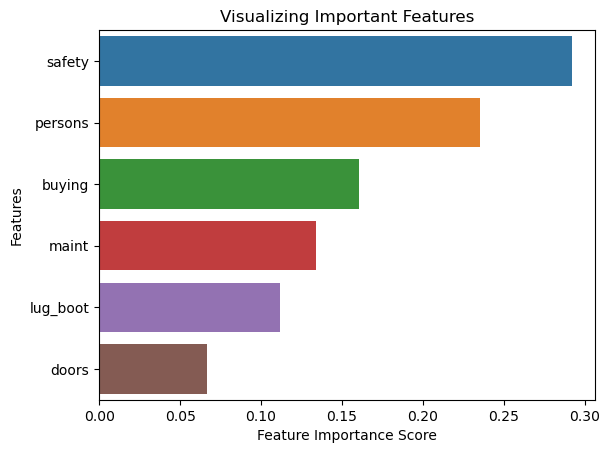

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()


# 11. Build Random Forest model on selected features

In [28]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [29]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [30]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [31]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


# 12. Confusion matrix 

In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


# 13. Classification Report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570

